C:\Users\Asus\AppData\Local\Temp\ipykernel_4636\1002589112.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Pastel1', 3)  # 3 colors: 0 (unpainted), 1, 2


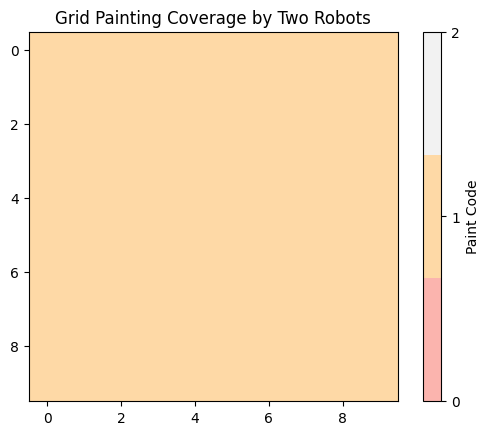

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def dfs_paint(grid, start, paint_color, visited):
    stack = [start]
    directions = [(0,1),(1,0),(0,-1),(-1,0)]
    rows, cols = grid.shape

    while stack:
        r, c = stack.pop()
        if (r,c) in visited:
            continue
        visited.add((r,c))
        grid[r][c] = paint_color
        
        for dr, dc in directions:
            nr, nc = r + dr, c + dc
            if 0 <= nr < rows and 0 <= nc < cols:
                if grid[nr][nc] == 0 and (nr, nc) not in visited:  # 0 means unpainted
                    stack.append((nr, nc))

def allocate_paint_tasks(grid, starts):
    visited = set()
    for idx, start in enumerate(starts):
        dfs_paint(grid, start, paint_color=idx+1, visited=visited)

def visualize_grid(grid):
    cmap = plt.cm.get_cmap('Pastel1', 3)  # 3 colors: 0 (unpainted), 1, 2
    plt.imshow(grid, cmap=cmap, vmin=0, vmax=2)
    plt.colorbar(ticks=[0,1,2], label="Paint Code")
    plt.title("Grid Painting Coverage by Two Robots")
    plt.show()

if __name__ == "__main__":
    # 10x10 grid with empty cells
    grid = np.zeros((10,10), dtype=int)
    # Starting points for two painting robots
    starts = [(0,0), (9,9)]

    allocate_paint_tasks(grid, starts)
    visualize_grid(grid)
